<a href="https://colab.research.google.com/github/itsRajatkumar/face_recognition_with_database/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install all dependancy

In [ ]:
!pip install face_recognition
!pip install numpy
!pip install scikit-learn
!pip install pysqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=3c0952c0c2058318c94f5f5babce71da0f91280c32466ba5f92a6b0167d8097a
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for

setup kaggle creadentials

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"thisisrajatkumar","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

Download dataset from kaggel

In [ ]:
! kaggle datasets download -d vishesh1412/celebrity-face-image-dataset
! kaggle datasets download -d tanishgupta26/famous-personalities-image-dataset
! kaggle datasets download -d iamsouravbanerjee/indian-actor-images-dataset

 98% 52.0M/52.9M [00:03<00:00, 20.0MB/s]
100% 52.9M/52.9M [00:04<00:00, 13.8MB/s]
100% 126M/126M [00:08<00:00, 19.8MB/s]
100% 126M/126M [00:08<00:00, 16.5MB/s]
 99% 287M/290M [00:17<00:00, 18.3MB/s]
100% 290M/290M [00:17<00:00, 17.4MB/s]


Unzip data set

In [ ]:
!unzip celebrity-face-image-dataset.zip
!unzip famous-personalities-image-dataset.zip
!unzip indian-actor-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/055956d330.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0996136e8c.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0da66bb466.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/0fe492a8e8.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/10c27a4ed7.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/169bdb8a71.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/1cef10d37a.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/20721b7931.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/22bfcf5465.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/2406e4d2f7.jpg  
  inflating: Bollywood Actor Images/Bollywood Actor Images/govinda/24e6904bd3.jpg  
  inflating: Bollywood Ac

Create table top store the face encoding values

In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
! cp -r "Celebrity Faces Dataset/" /gdrive/MyDrive/face_rec/
! cp -r /content/Dataset/Dataset/* "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/"
! cp -r "/content/Bollywood Actor Images/Bollywood Actor Images"/* "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/"

In [ ]:
# Create a table for storing face encodings
import sqlite3
import face_recognition
conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
# conn = sqlite3.connect("mydatabase.db")
cur = conn.cursor()
cur.execute('''CREATE TABLE IF NOT EXISTS face_encodings (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    e1 FLOAT NOT NULL,
    e2 FLOAT NOT NULL,
    e3 FLOAT NOT NULL,
    e4 FLOAT NOT NULL,
    e5 FLOAT NOT NULL,
    e6 FLOAT NOT NULL,
    e7 FLOAT NOT NULL,
    e8 FLOAT NOT NULL,
    e9 FLOAT NOT NULL,
    e10 FLOAT NOT NULL,
    e11 FLOAT NOT NULL,
    e12 FLOAT NOT NULL,
    e13 FLOAT NOT NULL,
    e14 FLOAT NOT NULL,
    e15 FLOAT NOT NULL,
    e16 FLOAT NOT NULL,
    e17 FLOAT NOT NULL,
    e18 FLOAT NOT NULL,
    e19 FLOAT NOT NULL,
    e20 FLOAT NOT NULL,
    e21 FLOAT NOT NULL,
    e22 FLOAT NOT NULL,
    e23 FLOAT NOT NULL,
    e24 FLOAT NOT NULL,
    e25 FLOAT NOT NULL,
    e26 FLOAT NOT NULL,
    e27 FLOAT NOT NULL,
    e28 FLOAT NOT NULL,
    e29 FLOAT NOT NULL,
    e30 FLOAT NOT NULL,
    e31 FLOAT NOT NULL,
    e32 FLOAT NOT NULL,
    e33 FLOAT NOT NULL,
    e34 FLOAT NOT NULL,
    e35 FLOAT NOT NULL,
    e36 FLOAT NOT NULL,
    e37 FLOAT NOT NULL,
    e38 FLOAT NOT NULL,
    e39 FLOAT NOT NULL,
    e40 FLOAT NOT NULL,
    e41 FLOAT NOT NULL,
    e42 FLOAT NOT NULL,
    e43 FLOAT NOT NULL,
    e44 FLOAT NOT NULL,
    e45 FLOAT NOT NULL,
    e46 FLOAT NOT NULL,
    e47 FLOAT NOT NULL,
    e48 FLOAT NOT NULL,
    e49 FLOAT NOT NULL,
    e50 FLOAT NOT NULL,
    e51 FLOAT NOT NULL,
    e52 FLOAT NOT NULL,
    e53 FLOAT NOT NULL,
    e54 FLOAT NOT NULL,
    e55 FLOAT NOT NULL,
    e56 FLOAT NOT NULL,
    e57 FLOAT NOT NULL,
    e58 FLOAT NOT NULL,
    e59 FLOAT NOT NULL,
    e60 FLOAT NOT NULL,
    e61 FLOAT NOT NULL,
    e62 FLOAT NOT NULL,
    e63 FLOAT NOT NULL,
    e64 FLOAT NOT NULL,
    e65 FLOAT NOT NULL,
    e66 FLOAT NOT NULL,
    e67 FLOAT NOT NULL,
    e68 FLOAT NOT NULL,
    e69 FLOAT NOT NULL,
    e70 FLOAT NOT NULL,
    e71 FLOAT NOT NULL,
    e72 FLOAT NOT NULL,
    e73 FLOAT NOT NULL,
    e74 FLOAT NOT NULL,
    e75 FLOAT NOT NULL,
    e76 FLOAT NOT NULL,
    e77 FLOAT NOT NULL,
    e78 FLOAT NOT NULL,
    e79 FLOAT NOT NULL,
    e80 FLOAT NOT NULL,
    e81 FLOAT NOT NULL,
    e82 FLOAT NOT NULL,
    e83 FLOAT NOT NULL,
    e84 FLOAT NOT NULL,
    e85 FLOAT NOT NULL,
    e86 FLOAT NOT NULL,
    e87 FLOAT NOT NULL,
    e88 FLOAT NOT NULL,
    e89 FLOAT NOT NULL,
    e90 FLOAT NOT NULL,
    e91 FLOAT NOT NULL,
    e92 FLOAT NOT NULL,
    e93 FLOAT NOT NULL,
    e94 FLOAT NOT NULL,
    e95 FLOAT NOT NULL,
    e96 FLOAT NOT NULL,
    e97 FLOAT NOT NULL,
    e98 FLOAT NOT NULL,
    e99 FLOAT NOT NULL,
    e100 FLOAT NOT NULL,
    e101 FLOAT NOT NULL,
    e102 FLOAT NOT NULL,
    e103 FLOAT NOT NULL,
    e104 FLOAT NOT NULL,
    e105 FLOAT NOT NULL,
    e106 FLOAT NOT NULL,
    e107 FLOAT NOT NULL,
    e108 FLOAT NOT NULL,
    e109 FLOAT NOT NULL,
    e110 FLOAT NOT NULL,
    e111 FLOAT NOT NULL,
    e112 FLOAT NOT NULL,
    e113 FLOAT NOT NULL,
    e114 FLOAT NOT NULL,
    e115 FLOAT NOT NULL,
    e116 FLOAT NOT NULL,
    e117 FLOAT NOT NULL,
    e118 FLOAT NOT NULL,
    e119 FLOAT NOT NULL,
    e120 FLOAT NOT NULL,
    e121 FLOAT NOT NULL,
    e122 FLOAT NOT NULL,
    e123 FLOAT NOT NULL,
    e124 FLOAT NOT NULL,
    e125 FLOAT NOT NULL,
    e126 FLOAT NOT NULL,
    e127 FLOAT NOT NULL,
    e128 FLOAT NOT NULL)
''')

In [ ]:
import os
image_files = []
for subdir, dirs, files in os.walk("/gdrive/MyDrive/face_rec/Celebrity Faces Dataset"):
    print(dirs)
    for file in files:
        print(subdir + "/" +file)
        image_files.append( subdir + "/" +file)

Streaming output truncated to the last 5000 lines.
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/gulshan_grover/ab23834289.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/gulshan_grover/b389d1b66c.jpg
[]
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/04db0093a5.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/082bd33ab9.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/0bc3e9ea0c.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/0e9fb83873.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/170b737e59.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/1cc9415944.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/2077b58469.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/26af727ca8.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/29c44af006.jpg
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/hrithik_roshan/2bca6990df.jp

In [ ]:
cd 

Add Images encoding to database for further recognition

In [ ]:
import sqlite3
import face_recognition
import os

# Connect to database
conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
# conn = sqlite3.connect("mydatabase.db")
cur = conn.cursor()

image_files = []
for subdir, dirs, files in os.walk("/gdrive/MyDrive/face_rec/Celebrity Faces Dataset"):
    for file in files:
        image_files.append( subdir + "/" +file)
        

count =1
for image_file in image_files:
    image = face_recognition.load_image_file(image_file) # download the image from the cloud
    try:
        face_encodings = face_recognition.face_encodings(image)[0]
    except Exception as e:
        print(f"{image_file} with error {e}")
        continue
    query = f'''INSERT INTO face_encodings 
    (name ,e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28, e29, e30, e31, e32, e33, e34, e35, e36, e37, e38, e39, e40, e41, e42, e43, e44, e45, e46, e47, e48, e49, e50, e51, e52, e53, e54, e55, e56, e57, e58, e59, e60, e61, e62, e63, e64, e65, e66, e67, e68, e69, e70, e71, e72, e73, e74, e75, e76, e77, e78, e79, e80, e81, e82, e83, e84, e85, e86, e87, e88, e89, e90, e91, e92, e93, e94, e95, e96, e97, e98, e99, e100, e101, e102, e103, e104, e105, e106, e107, e108, e109, e110, e111, e112, e113, e114, e115, e116, e117, e118, e119, e120, e121, e122, e123, e124, e125, e126, e127, e128)
     VALUES ( "{image_file.split("/")[1]}",{', '.join(str(e) for e in face_encodings)})'''
    # Execute query
    cur.execute(query)
    count = count + 1
conn.commit()
print("Completed")
# Build INSERT query
conn.commit()

# Close database connection
cur.close()
conn.close()


/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Brad Pitt/060_136e5ef5.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Denzel Washington/026_2f832037.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Denzel Washington/055_fbbcb3c7.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Denzel Washington/061_6bf34908.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Denzel Washington/093_4027b1e2.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Hugh Jackman/095_b464eda0.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Johnny Depp/043_77e393de.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Johnny Depp/081_059a278c.jpg with error list index out of range
/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Kate Winslet/050_0c20b21

KeyboardInterrupt: ignored

In [ ]:
# !wget https://m.media-amazon.com/images/M/MV5BMTI5ODY5NTUzMF5BMl5BanBnXkFtZTcwOTAzNTIzMw@@._V1_.jpg
# !wget https://www.bosshunting.com.au/wp-content/uploads/2022/03/Tom-Cruise-Iron-Man.jpg
# !wget https://m.media-amazon.com/images/M/MV5BMTM3OTUwMDYwNl5BMl5BanBnXkFtZTcwNTUyNzc3Nw@@._V1_FMjpg_UX1000_.jpg

Check the Image found in Database

In [ ]:
import sqlite3
import face_recognition
import numpy as np
import math
def sqlite_power(x,n):
    return (x)**n
# Connect to database
def detect_who_is_this(imageFile):
    conn = sqlite3.connect("/gdrive/MyDrive/face_rec/mydatabase.db")
    cur = conn.cursor()
    conn.create_function('sqrt', 1, math.sqrt)
    conn.create_function("power", 2, sqlite_power)

    # Load test face image and compute encoding
    test_face_image = face_recognition.load_image_file(imageFile)
    test_face_encoding = face_recognition.face_encodings(test_face_image)[0]
    # print(test_face_encoding)
    # Build SELECT query with Euclidean distance calculation
    query = '''SELECT id, name, e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28, e29, e30, e31, e32, e33, e34, e35, e36, e37, e38, e39, e40, e41, e42, e43, e44, e45, e46, e47, e48, e49, e50, e51, e52, e53, e54, e55, e56, e57, e58, e59, e60, e61, e62, e63, e64, e65, e66, e67, e68, e69, e70, e71, e72, e73, e74, e75, e76, e77, e78, e79, e80, e81, e82, e83, e84, e85, e86, e87, e88, e89, e90, e91, e92, e93, e94, e95, e96, e97, e98, e99, e100, e101, e102, e103, e104, e105, e106, e107, e108, e109, e110, e111, e112, e113, e114, e115, e116, e117, e118, e119, e120, e121, e122, e123, e124, e125, e126, e127, e128 FROM face_encodings
            ORDER BY
            SQRT(
            POWER(e1 - ?, 2) + POWER(e2 - ?, 2) + POWER(e3 - ?, 2) + POWER(e4 - ?, 2) + POWER(e5 - ?, 2) + POWER(e6 - ?, 2) + POWER(e7 - ?, 2) + POWER(e8 - ?, 2) + POWER(e9 - ?, 2) + POWER(e10 - ?, 2) + POWER(e11 - ?, 2) + POWER(e12 - ?, 2) + POWER(e13 - ?, 2) + POWER(e14 - ?, 2) + POWER(e15 - ?, 2) + POWER(e16 - ?, 2) + POWER(e17 - ?, 2) + POWER(e18 - ?, 2) + POWER(e19 - ?, 2) + POWER(e20 - ?, 2) + POWER(e21 - ?, 2) + POWER(e22 - ?, 2) + POWER(e23 - ?, 2) + POWER(e24 - ?, 2) + POWER(e25 - ?, 2) + POWER(e26 - ?, 2) + POWER(e27 - ?, 2) + POWER(e28 - ?, 2) + POWER(e29 - ?, 2) + POWER(e30 - ?, 2) + POWER(e31 - ?, 2) + POWER(e32 - ?, 2) + POWER(e33 - ?, 2) + POWER(e34 - ?, 2) + POWER(e35 - ?, 2) + POWER(e36 - ?, 2) + POWER(e37 - ?, 2) + POWER(e38 - ?, 2) + POWER(e39 - ?, 2) + POWER(e40 - ?, 2) + POWER(e41 - ?, 2) + POWER(e42 - ?, 2) + POWER(e43 - ?, 2) + POWER(e44 - ?, 2) + POWER(e45 - ?, 2) + POWER(e46 - ?, 2) + POWER(e47 - ?, 2) + POWER(e48 - ?, 2) + POWER(e49 - ?, 2) + POWER(e50 - ?, 2) + POWER(e51 - ?, 2) + POWER(e52 - ?, 2) + POWER(e53 - ?, 2) + POWER(e54 - ?, 2) + POWER(e55 - ?, 2) + POWER(e56 - ?, 2) + POWER(e57 - ?, 2) + POWER(e58 - ?, 2) + POWER(e59 - ?, 2) + POWER(e60 - ?, 2) + POWER(e61 - ?, 2) + POWER(e62 - ?, 2) + POWER(e63 - ?, 2) + POWER(e64 - ?, 2) + POWER(e65 - ?, 2) + POWER(e66 - ?, 2) + POWER(e67 - ?, 2) + POWER(e68 - ?, 2) + POWER(e69 - ?, 2) + POWER(e70 - ?, 2) + POWER(e71 - ?, 2) + POWER(e72 - ?, 2) + POWER(e73 - ?, 2) + POWER(e74 - ?, 2) + POWER(e75 - ?, 2) + POWER(e76 - ?, 2) + POWER(e77 - ?, 2) + POWER(e78 - ?, 2) + POWER(e79 - ?, 2) + POWER(e80 - ?, 2) + POWER(e81 - ?, 2) + POWER(e82 - ?, 2) + POWER(e83 - ?, 2) + POWER(e84 - ?, 2) + POWER(e85 - ?, 2) + POWER(e86 - ?, 2) + POWER(e87 - ?, 2) + POWER(e88 - ?, 2) + POWER(e89 - ?, 2) + POWER(e90 - ?, 2) + POWER(e91 - ?, 2) + POWER(e92 - ?, 2) + POWER(e93 - ?, 2) + POWER(e94 - ?, 2) + POWER(e95 - ?, 2) + POWER(e96 - ?, 2) + POWER(e97 - ?, 2) + POWER(e98 - ?, 2) + POWER(e99 - ?, 2) + POWER(e100 - ?, 2) + POWER(e101 - ?, 2) + POWER(e102 - ?, 2) + POWER(e103 - ?, 2) + POWER(e104 - ?, 2) + POWER(e105 - ?, 2) + POWER(e106 - ?, 2) + POWER(e107 - ?, 2) + POWER(e108 - ?, 2) + POWER(e109 - ?, 2) + POWER(e110 - ?, 2) + POWER(e111 - ?, 2) + POWER(e112 - ?, 2) + POWER(e113 - ?, 2) + POWER(e114 - ?, 2) + POWER(e115 - ?, 2) + POWER(e116 - ?, 2) + POWER(e117 - ?, 2) + POWER(e118 - ?, 2) + POWER(e119 - ?, 2) + POWER(e120 - ?, 2) + POWER(e121 - ?, 2) + POWER(e122 - ?, 2) + POWER(e123 - ?, 2) + POWER(e124 - ?, 2) + POWER(e125 - ?, 2) + POWER(e126 - ?, 2) + POWER(e127 - ?, 2) + POWER(e128 - ?, 2)
            )
            LIMIT 1'''

    cur.execute(query, tuple(test_face_encoding))
    result = cur.fetchone()
    is_matched = face_recognition.compare_faces([np.array(result[2:])], test_face_encoding)
    cur.close()
    conn.close()
    return {
        "Matched":is_matched[0], 
        "Name":result[1]
    }


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

test_images = [
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Robert Downey Jr/007_ecb8599e.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Sandra Bullock/009_41aa3ed9.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Tom Hanks/006_a28f75e7.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Scarlett Johansson/008_10846cce.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Angelina Jolie/011_7344ca35.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Denzel Washington/007_1f6f632a.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Brad Pitt/007_74ccfb4a.jpg",
    "/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Johnny Depp/005_9406f32d.jpg"
               ]

for image in test_images:
  data = detect_who_is_this(image)
  if(data["Matched"]):
    name = data["Name"]
    print(f"Found in DataBase with Name : {name}")
  else:
    print(f"Not Found in DataBase")

#   print(f"Image {image} is {name_of_user[0]}")
#   print(name_of_user)
#   img = cv2.imread(image, cv2.IMREAD_UNCHANGED)
#   cv2_imshow(img)
    

Found in DataBase with Name : Robert Downey Jr
Found in DataBase with Name : Sandra Bullock
Found in DataBase with Name : Tom Hanks
Found in DataBase with Name : Scarlett Johansson
Found in DataBase with Name : Angelina Jolie
Found in DataBase with Name : Denzel Washington
Found in DataBase with Name : Brad Pitt
Found in DataBase with Name : Johnny Depp


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

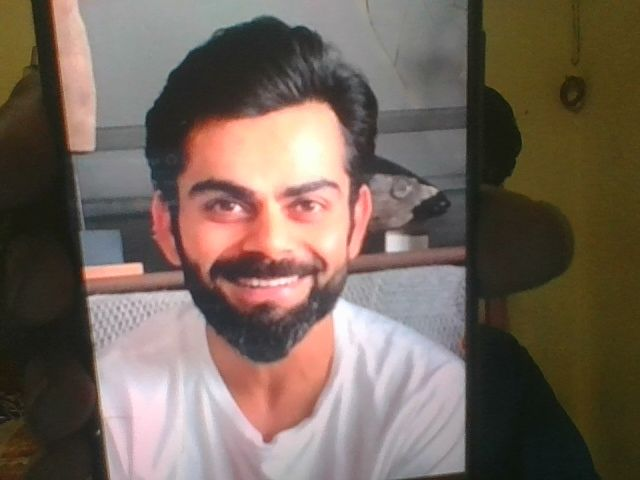

Found in DataBase with Name : Robert Downey Jr


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  display(Image(filename))
  data = detect_who_is_this(filename)
  if(data["Matched"]):
    name = data["Name"]
    print(f"Found in DataBase with Name : {name}")
  else:
    print(f"Not Found in DataBase")
except Exception as err:
  print(str(err))

In [ ]:
import face_recognition
test_face_image = face_recognition.load_image_file("/gdrive/MyDrive/face_rec/Celebrity Faces Dataset/Virat_Kohli/Virat_Kohli10.png")
test_face_encoding = face_recognition.face_encodings(test_face_image)[0]
print(test_face_encoding)

[-1.08188823e-01  6.24001771e-03 -2.57126987e-02 -7.28057325e-02
 -5.36634773e-02 -2.81722285e-02  5.21275811e-02 -3.36562172e-02
  1.66772559e-01 -2.24925205e-03  1.15178898e-01  6.21928647e-03
 -2.64415562e-01 -8.66183266e-03 -6.43403679e-02  5.11340909e-02
 -1.71884581e-01 -1.28345981e-01 -4.04349416e-02 -9.29329097e-02
  3.84901278e-02  4.80484031e-02  2.40866952e-02  1.03316993e-01
 -1.80373877e-01 -2.93245494e-01 -1.06875509e-01 -1.58971280e-01
 -1.43768117e-02 -1.26542494e-01  3.77294049e-02  4.74511571e-02
 -2.01460451e-01 -6.59975260e-02  1.02623254e-02  7.53403604e-02
  2.05603912e-02 -8.54833499e-02  1.34670243e-01  7.67703280e-02
 -1.15630075e-01 -1.65279806e-02 -3.76880169e-04  3.48573059e-01
  7.63548464e-02  4.03379127e-02  3.31631154e-02 -6.20518625e-03
  9.75855812e-02 -2.42968842e-01  1.06127851e-01  1.24480017e-01
  8.90240818e-02 -1.91464424e-02  4.24521193e-02 -1.08236052e-01
  3.50619853e-02  1.42583773e-01 -2.10594058e-01  1.11684710e-01
  1.00432336e-01 -4.34128